In [11]:
import numpy as np 
import pandas as pd 


In [12]:
import os
for dirname, _, filenames in os.walk('E:/dataset/UCI_PPG'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:/dataset/UCI_PPG\part_1.mat
E:/dataset/UCI_PPG\part_10.mat
E:/dataset/UCI_PPG\part_11.mat
E:/dataset/UCI_PPG\part_12.mat
E:/dataset/UCI_PPG\part_2.mat
E:/dataset/UCI_PPG\part_3.mat
E:/dataset/UCI_PPG\part_4.mat
E:/dataset/UCI_PPG\part_5.mat
E:/dataset/UCI_PPG\part_6.mat
E:/dataset/UCI_PPG\part_7.mat
E:/dataset/UCI_PPG\part_8.mat
E:/dataset/UCI_PPG\part_9.mat
E:/dataset/UCI_PPG\Samples\rec_1.csv
E:/dataset/UCI_PPG\Samples\rec_10.csv
E:/dataset/UCI_PPG\Samples\rec_100.csv
E:/dataset/UCI_PPG\Samples\rec_101.csv
E:/dataset/UCI_PPG\Samples\rec_102.csv
E:/dataset/UCI_PPG\Samples\rec_103.csv
E:/dataset/UCI_PPG\Samples\rec_104.csv
E:/dataset/UCI_PPG\Samples\rec_105.csv
E:/dataset/UCI_PPG\Samples\rec_106.csv
E:/dataset/UCI_PPG\Samples\rec_107.csv
E:/dataset/UCI_PPG\Samples\rec_108.csv
E:/dataset/UCI_PPG\Samples\rec_109.csv
E:/dataset/UCI_PPG\Samples\rec_11.csv
E:/dataset/UCI_PPG\Samples\rec_110.csv
E:/dataset/UCI_PPG\Samples\rec_111.csv
E:/dataset/UCI_PPG\Samples\rec_112.csv
E:/dataset/UCI_PP

In [13]:
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing

from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)

import os # system-wide functions
os.listdir('E:/dataset/UCI_PPG')

['part_1.mat',
 'part_10.mat',
 'part_11.mat',
 'part_12.mat',
 'part_2.mat',
 'part_3.mat',
 'part_4.mat',
 'part_5.mat',
 'part_6.mat',
 'part_7.mat',
 'part_8.mat',
 'part_9.mat',
 'Samples']

In [14]:
def rmse(y_true, y_pred):
    """Computes the Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

sample_file = scipy.io.loadmat(f'E:/dataset/UCI_PPG/part_{1}.mat')
print(f'sample_file Data type: {type(sample_file)}')
print(f'sample_file keys:\n{sample_file.keys()}')

sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])


In [15]:
print(f"Total Samples: {len(test_sample[0])}")
print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")
print(f"Number of samples in each reading(PPG): {len(test_sample[0][0][1])}")

temp_mat = test_sample[0, 999]
temp_length = temp_mat.shape[1]
sample_size = 125


print(temp_length)
print((int)(temp_length/sample_size))

NameError: name 'test_sample' is not defined

In [18]:
sample_size = 125
ppg = []
for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        ppg.append(temp_ppg)

In [19]:
ecg = []
bp = []
sbp = [] #Systolic Blood Pressure
dbp = [] #Diastolic Blood Pressue
size = 125 #sample size

for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ecg = temp_mat[2, j*size:(j+1)*size]
        temp_bp = temp_mat[1, j*size:(j+1)*size]
        
        max_value = max(temp_bp)
        min_value = min(temp_bp)
        
        sbp.append(max_value)
        dbp.append(min_value)
        ecg.append(temp_ecg)
        bp.append(temp_bp)

In [20]:
ppg, ecg, bp = np.array(ppg).reshape(-1,1), np.array(ecg).reshape(-1,1), np.array(bp).reshape(-1,1)
sbp, dbp = np.array(sbp).reshape(-1,1), np.array(dbp).reshape(-1,1)
print(f'PPG_shape: {ppg.shape}\n ECG_shape: {ecg.shape}\n BP_shape: {bp.shape}')
print(f'Systolic-BP_shape: {sbp.shape},\n Diastolic-BP_shape: {dbp.shape}')

PPG_shape: (32061000, 1)
 ECG_shape: (32061000, 1)
 BP_shape: (32061000, 1)
Systolic-BP_shape: (256488, 1),
 Diastolic-BP_shape: (256488, 1)


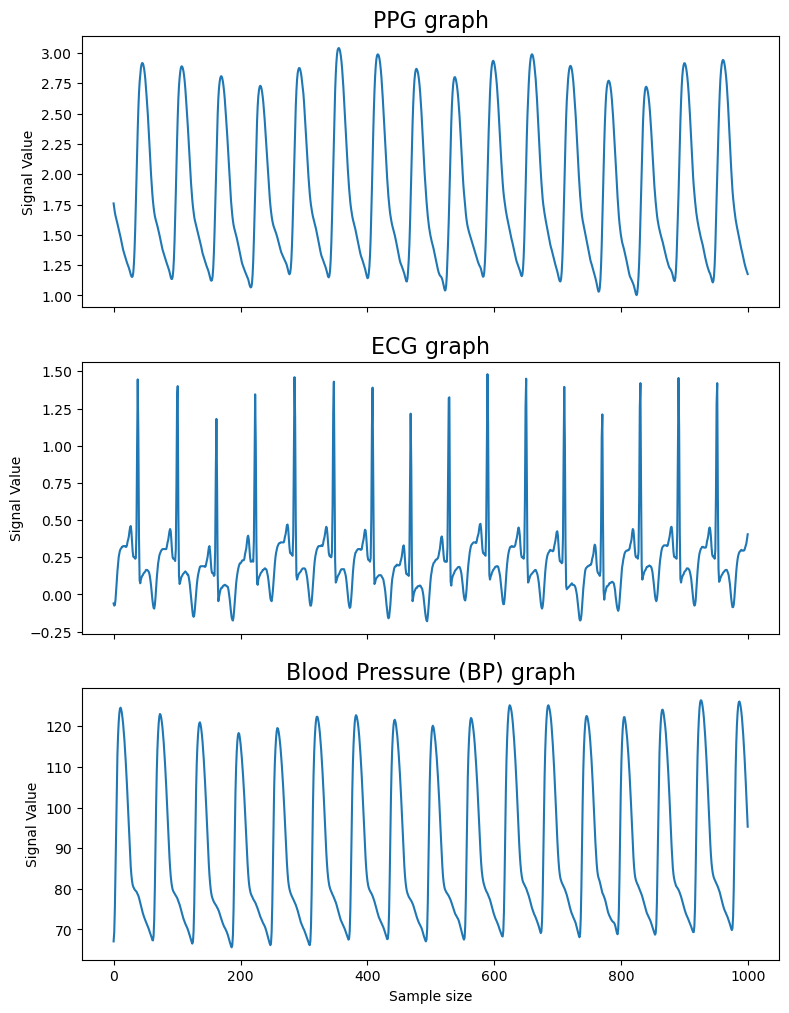

In [21]:
fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)

ax[0].set_title('PPG graph', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ppg[:1000])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(ecg[:1000])

ax[2].set_title('Blood Pressure (BP) graph', fontsize=16)
ax[2].set_ylabel('Signal Value')
ax[2].set_xlabel('Sample size')
ax[2].plot(bp[:1000])